# Caso práctico en clase ML - Supervisado

Tomando el siguiente archivo csv Churn_Modelling.csv con información de una entidad bancaria, se realizará un análisis predictivo (a través de un GLM) para evitar el abandono del cliente de la entidad bancaria o, Customer churn prediction, es decir, intentaremos predecir cuando un cliente va a cerrar su cuenta. El dataset origintal puede descargarse y consultarse a través del siguiente enlace: https://www.kaggle.com/shrutimechlearn/churn-modelling

El dataset está compuesto por 10000 filas y 14 variables sobre las que disponemos de la siguiente información:

RowNumber: Numérico. Número de fila.
CustomerId: Numérico. ID del cliente en la entidad bancaria.
Surname: Categórica con 2932 niveles. Apellido del cliente.
CreditScore: Numérica. Puntuación de credit score, la calidad de la puntuación de un credit score es la siguiente:
    Malo: Menos de 550 puntos.
    Regular: 551 a 649 puntos.
    Bueno: 650 a 749 puntos.
    Excelente: 750 en adelante.
Geography: Categórica con 3 niveles. País del cliente.
Gender: Categórica de 2 niveles. Sexo del cliente.
Age: Numérica, edad del cliente.
Tenure: Numérica, número de años que lleva el cliente en el banco.
Balance: Numérica, cuenta corriente del cliente.
NumOfProducts: Numérica, número de productos que utiliza el cliente en el banco.
HasCrCard: Numérica binaria, tenencia (0) o no tenencia de tarjeta de crédito (1).
IsActiveMember: Numérica binaria, indica si el cliente es activo (0) en su cuenta bancaria o no (1).
EstimatedSalary: Numérica, salario estimado que puede tener el cliente en dólares.
Exited: Numérica binaria. Variable objetivo, si el cliente cierra su cuenta 1 y 0 si el cliente mantiene su cuenta.

# Teniendo la siguiente información se pide realizar:
1. Carga el archivo csv como un dataframe.
2. Muestra el vcontenido del dataframe
3. Obtén la estructura del dataframe (object, int, categoricas, ...)
4. Muestra las columnas
5. Elimina las variables RowNumber, CustomerID y Surname por innecesarias
6. Recodifica las siguientes variables binarias a categóricas con los siguintes factores o niveles:
    HascrCard. 0: 'SI_CREDIT_CARD', 1: 'NO_CREDIT_CARD'.
    IsActiveMember 0: 'SI_ACTIVO', 1: 'NO_ACTIVO'.
7. Pasa las variable Geography y Gender a numericas
8. Examina si el dataset tiene valores nulos.
9. Gráfica en función de si es variable numérica o categórica.

# Caso Practico

## Tratamiento del csv Churn_Modeling

Vamos a hacer un EDA Analisis Exploratorio de Datos

In [ ]:
#1.- 
import pandas as pd
fichero1 ='Churn_Modelling.csv'
df = pd.read_csv(fichero1)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Tamaño

In [ ]:
df.size

140000

# Filas y Columnas

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.shape[0]

10000

In [ ]:
df.shape[1]

14

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#5.
df.drop(["RowNumber", "CustomerId", "Surname"], 1, inplace=True)

df.columns # Verificamos si se han borrado correctamente las columnas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#6. 
# HasCrCard
#df.loc[df.HasCrCard == 0, "HasCrCard"] = "SI_CREDIT_CARD"
#df.loc[df.HasCrCard == 1, "HasCrCard"] = "NO_CREDIT_CARD"

# IsActiveMember
#df.loc[df.IsActiveMember == 0, "IsActiveMember"] = "SI_ACTIVO"
#df.loc[df.IsActiveMember == 1, "IsActiveMember"] = "NO_ACTIVO"

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography'] = pd.Categorical(df['Geography'])
df['Gender'] = pd.Categorical(df['Gender'])

In [ ]:
gender_dummy = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, gender_dummy], axis=1)


df = df.drop(['Gender'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Age              10000 non-null  int64   
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  int64   
 6   HasCrCard        10000 non-null  int64   
 7   IsActiveMember   10000 non-null  int64   
 8   EstimatedSalary  10000 non-null  float64 
 9   Exited           10000 non-null  int64   
 10  Gender_Female    10000 non-null  uint8   
 11  Gender_Male      10000 non-null  uint8   
dtypes: category(1), float64(2), int64(7), uint8(2)
memory usage: 732.7 KB


In [ ]:
df['Geography'] = df['Geography'].cat.codes

df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Gender_Female    10000 non-null  uint8  
 11  Gender_Male      10000 non-null  uint8  
dtypes: float64(2), int64(7), int8(1), uint8(2)
memory usage: 732.5 KB


In [ ]:
# Mostramos con isnull (que sume los True) si hay valores nulos
df.isnull().sum()

CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Female      0
Gender_Male        0
dtype: int64

# 9. Gráfica de las variables numérica .
Comenzaremos implementando un bucle for donde las variables numéricas serán histogramas para poder estudiar su distribución, 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


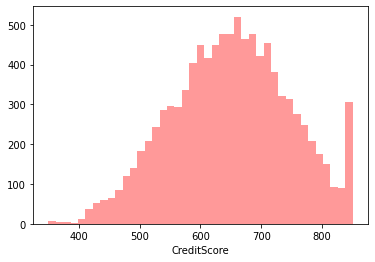

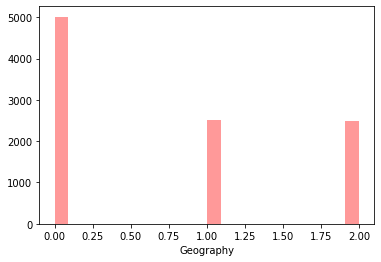

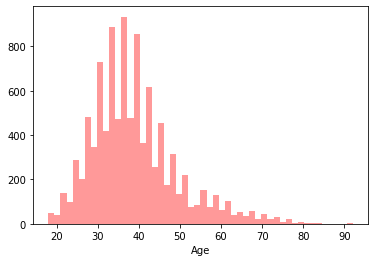

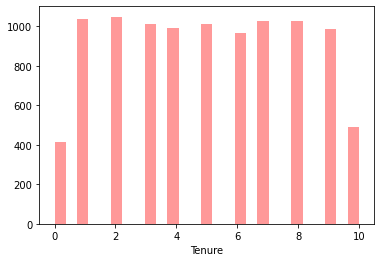

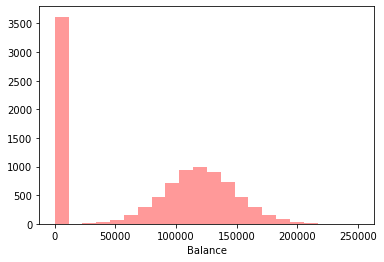

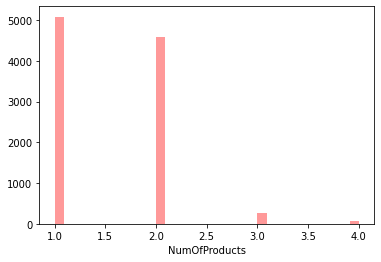

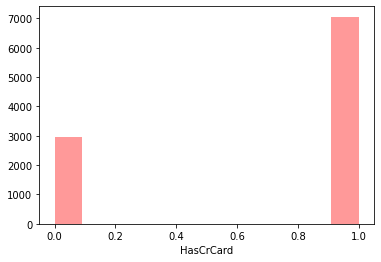

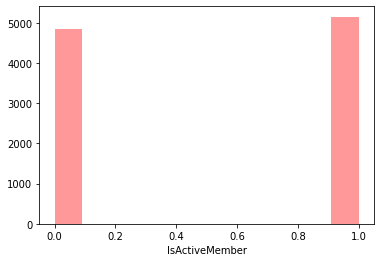

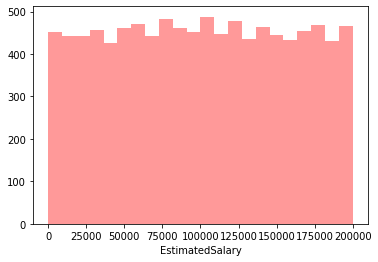

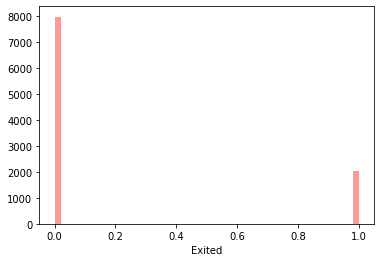

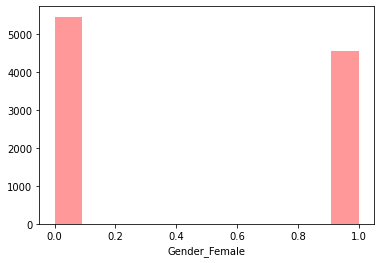

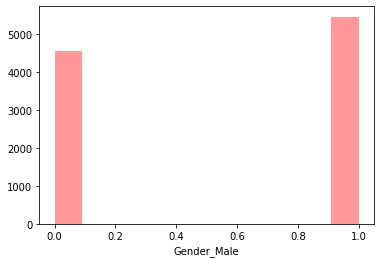

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
for columna in df.columns:
        sns.distplot(a=df[columna], color = "red", kde=False)
        plt.show()

#  Algunas observaciones sobre las gráficas individuales:

CreditScore: Por lo general, se concentran en valores de calidad Regular y Bueno, algo habitual en una entidad bancaria.

Geography: Vemos que la gran mayoría de los clientes son de Francia y de forma muy similar los clientes de Alemania y España.

Gender: Se observa que el número de clientes de sexo hombre es ligeramente superior al de clientes con sexo mujer.

Age: La mayor concentración de clientes se sitúa entre los 25 y los 45 años reduciendo de forma drástica a partir de ese dato, por lo general, los clientes de esta entidad bancaria son jovenes.

Tenure: En función de la estructura de esta variable se puede extrapolar que uBna posible modificaciónde la misma sería su discretización. Respecto al análisis de sus valores numéricos, salvo por clientes que aún no han cumplido el primer año de antiguedad y los que han cumplido 10 años, el resto de valores se reparten de una forma muy simétrica.

Balance: Se observa que una gran cantidad de clientes, casi 4000 clientes, no tienen ningún tipo de balance o lo que es lo mismo, no tiene ningún disponible en su cuenta, sería interesante comprobar si estos clientes concuerdan con los clientes no activos de la variable "IsActiveMember".
 

# Normalidad

# ¿Cómo saber si una variable sigue una distribución normal en Python?

Saber si una variable sigue una distribución normal o no es muy importante en ciertos problemas de ciencia de datos y aprendizaje automático. Existen ciertas pruebas que nos permiten comprobar si una distribución sigue una forma normal o Gaussiana.

Funciones de distribucion

Primero de todo quiero definir lo que es una función de distribución, para partir de la misma base todos. La función de distribución de una variable aleatoria es una función que especifica la probabilidad de que los valores observados de la variable se encuentren en cualquier región dada de valores posibles.

Ejemplos de funciones de distribución que pueden seguir las variables:

Distribución normal o Gaussiana
La distribución normal (también llamada Gaussiana) es la más utilizada en estadística. Es muy común encontrar variables que siguen distribuciones normales en fenómenos de la naturaleza. 

Una variable que se distribuye de manera normal tiene un histograma (función de densidad) con forma de campana, con un pico y es simétrica alrededor de la media. 

Existen términos como la curtosis o la asimetría de la distribución que se utilizan a menudo para describir cómo se desvía una distribución de la normalidad.

Representacion de una funcion de distribucion normal

Una característica de la función de distribución normal es que la media, moda y mediana son iguales.

La media, la mediana y la moda son herramientas estadísticas básicas y fáciles de calcular, pero a veces pueden confundirse.

La media, la mediana y la moda son las tres medidas de tendencia central más usadas para poblaciones que no cuentan con demasiados datos, es decir, que no necesitan agruparse.

Al hablar de medidas de tendencia central, nos referimos a medidas estadísticas que pretenden resumir en un único valor a un conjunto de valores.

La media, mediana y moda se expresan en la misma unidad que los datos originales.

¿Qué es la media?

La media, también conocida como promedio, es el valor que se obtiene al dividir la suma de un conglomerado de números entre la cantidad de ellos.

Algunas caracteristicas de la media son:

Considera todas las puntuaciones
El numerador de la fórmula es la cantidad de valores
Cuando hay puntuaciones extremas (outliers), no tiene una representación exacta de la muestra

¿Qué es la mediana?

La mediana de un conjunto es un valor que se encuentra a la mitad de los otros valores, es decir, que al ordenar los números de menor a mayor, éste se encuentra justamente en medio entre los que están por arriba.

Algunas caracteristicas de la mediana son:

Las operaciones para calcular el valor son muy sencillas de realizar.
La medida no depende de los valores de las variables, solamente de su orden.
Generalmente, los valores son enteros.
Se puede calcular aunque los números que se encuentren arriba y abajo no tengan límites.  

¿Qué es la moda?

La moda es el valor que aparece más dentro de un conglomerado. En un grupo puede haber dos modas y se conoce como bimodal, y más de dos modas o multimodal cuando se repiten más de dos valores; se llama amodal cuando en un conglomerado no se repiten los valores.

Por último, se conoce como moda adictiva cuando dos valores continuos tienen la misma cantidad de repeticiones. En este caso se saca el promedio de ambos.

Las principales características de la moda son:

Es una muestra muy clara
Las operaciones para determinar el resultado son muy fáciles de elaborar
Los valores que se presentan pueden ser cualitativos y cuantitativos


# Mostrar una distribucion normal pura

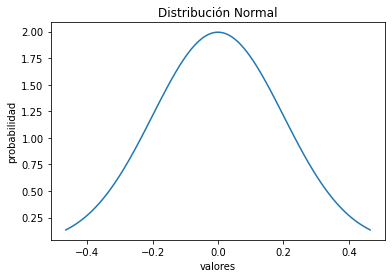

In [ ]:
import scipy
from scipy import stats
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# Mostrar una distribucion aleatoria que tienda a la **normalidad**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


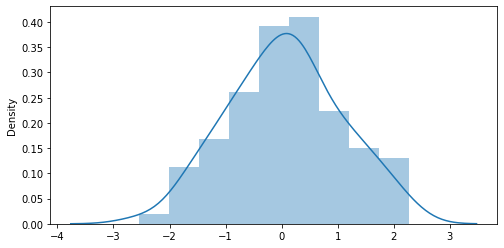

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,4))



np.random.seed( 0 ) 
x = np.random.randn( 100 ) 
x
ax = sns.distplot(x) 
plt.show()


#Métodos para saber si mis variables provienen de una distribucion normal

Con histogramas (que ya lo hemos hecho)

Aplicando el test de Shapiro

# Aplicamos el test de Shapiro

In [ ]:
from scipy.stats import shapiro
for columna_numerica  in df.columns:
    # Aplicamos shapiro
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.994, p-value=0.000
La variable  CreditScore  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.747, p-value=0.000
La variable  Geography  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.944, p-value=0.000
La variable  Age  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.949, p-value=0.000
La variable  Tenure  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.846, p-value=0.000
La variable  Balance  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.706, p-value=0.000
La variable  NumOfProducts  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.572, p-value=0.000
La variable  HasCrCard  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.636, p-value=0.000
La variable  IsActiveMember  NO provien

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#  Normalizar datos 
Es una técnica que se aplica a un conjunto de datos para reducir su redundancia. El objetivo principal de esta técnica es asociar formas similares a los mismos datos en una única forma de datos.

El objetivo de la normalización es cambiar los valores de las columnas numéricas del conjunto de datos para usar una escala común, sin distorsionar las diferencias en los intervalos de valores ni perder información.

La normalización de las variables numericas implica llevar los valores de las columnas a una escala común, lo que se hace principalmente para las columnas con rangos variados.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



df = scaler.fit_transform(df)

In [ ]:
df

array([[-0.32622142, -0.90188624,  0.29351742, ...,  1.97716468,
         1.09598752, -1.09598752],
       [-0.44003595,  1.51506738,  0.19816383, ..., -0.50577476,
         1.09598752, -1.09598752],
       [-1.53679418, -0.90188624,  0.29351742, ...,  1.97716468,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.90188624, -0.27860412, ...,  1.97716468,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.30659057,  0.29351742, ...,  1.97716468,
        -0.91241915,  0.91241915],
       [ 1.46377078, -0.90188624, -1.04143285, ..., -0.50577476,
         1.09598752, -1.09598752]])

In [ ]:
df.size

120000

In [ ]:
df.shape[0]

10000

In [ ]:
df.shape[1]

12